# YULU - Business Case Study

Yulu is a Bangalore-based company that has partnered with Bajaj Auto to launch an electric bike-sharing program. Yulu electric two-wheelers bikes are co-designed and manufactured by Bajaj Company for Indian customers.

Yulu is a Mobile Application to find the closest vehicle available and  being rented from the nearest Yulu Zone.Yulu operates in Bengaluru, Delhi, Gurugram, Mumbai, Pune, and Bhubaneswar with 18,000 single-seater vehicles across 2.5 million users.Yulu Bike is the state of the art and it runs in electric and designed for solo riding/ single person commuting and if 2 or more ppl are riding together the form faction and bike alignment is damaged to a great extent. 

## Problem Statement

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market

The company wants to know:

- Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
- How well those variables describe the electric cycle demands


### Following are the analysis made in this notebook

- Count of registered and casual users by weather , holiday , season , workingday

- Casual vs registeres users count 

- Rainy day vs clear day users count

- Windspeed vs user count

- Univariate , bivariate analysia

- Hypothesis testing - Chi-square , anova ,2 -sample t test

- Confidence interval

- Recommendations & Observations



In [121]:
#impoorting Libraties

import numpy as np
import numpy.random as rd
import pandas as pd
import matplotlib.pyplot as plt
import plotly as pt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline
%config InlineBackend.figure_format ='retina'

#statastics 
from scipy.stats import norm
from scipy import stats
from scipy.stats import chi2_contingency

In [122]:
df= pd.read_csv("yulu.csv")

In [123]:
# Printing first 5 rows in dataframe
df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [124]:
# Shape of dataframe
df.shape

(10886, 12)

In [125]:
# Columns in yulu dataset
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

Data type of Datetime,Season,holiday,workingday,weather columns needs to be changed




In [126]:
df['datetime'] = pd.to_datetime(df['datetime'])

cols_change= ['season', 'holiday', 'workingday', 'weather']
for column in cols_change:
    df[column] = df[column].astype('object')

In [127]:
df.dtypes

datetime      datetime64[ns]
season                object
holiday               object
workingday            object
weather               object
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [128]:
# Finding any null values present in dataset
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

No null values present in dataset

In [129]:
df.describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [130]:
df.describe(include=["object"])

,season,holiday,workingday,weather
count,10886,10886,10886,10886
unique,4,2,2,4
top,4,0,1,1
freq,2734,10575,7412,7192


We can see, sesaon , holiday , workingday , weather are the category columns present

In [131]:
#Category columns
category_columns=df.dtypes=="O"
cat_cols= category_columns[category_columns].index
cat_cols

Index(['season', 'holiday', 'workingday', 'weather'], dtype='object')

In [132]:
#Numerical columns
numerical_columns=df.dtypes!="O"
num_cols= numerical_columns[numerical_columns].index
num_cols

Index(['datetime', 'temp', 'atemp', 'humidity', 'windspeed', 'casual',
       'registered', 'count'],
      dtype='object')

We can see , 'temp', 'atemp', 'humidity', 'windspeed', 'casual',
       'registered', 'count' are the numerical columns present
      

## Value counts present-  columnswise

In [133]:
columns = ['season', 'holiday', 'workingday', 'weather','registered', 'count', 'casual']
for col in columns:
  print("Value Counts in", col)
  print("")
  print(df[col].value_counts())
  print("")

Value Counts in season

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

Value Counts in holiday

0    10575
1      311
Name: holiday, dtype: int64

Value Counts in workingday

1    7412
0    3474
Name: workingday, dtype: int64

Value Counts in weather

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

Value Counts in registered

3      195
4      190
5      177
6      155
2      150
      ... 
570      1
422      1
678      1
565      1
636      1
Name: registered, Length: 731, dtype: int64

Value Counts in count

5      169
4      149
3      144
6      135
2      132
      ... 
801      1
629      1
825      1
589      1
636      1
Name: count, Length: 822, dtype: int64

Value Counts in casual

0      986
1      667
2      487
3      438
4      354
      ... 
332      1
361      1
356      1
331      1
304      1
Name: casual, Length: 309, dtype: int64



## Correlating in Heatmap

In [134]:
df_copy = df.copy().corr()
fig = px.imshow(df_copy, text_auto=True, width=1000, height=600)
fig.show()



## Univariate analysis

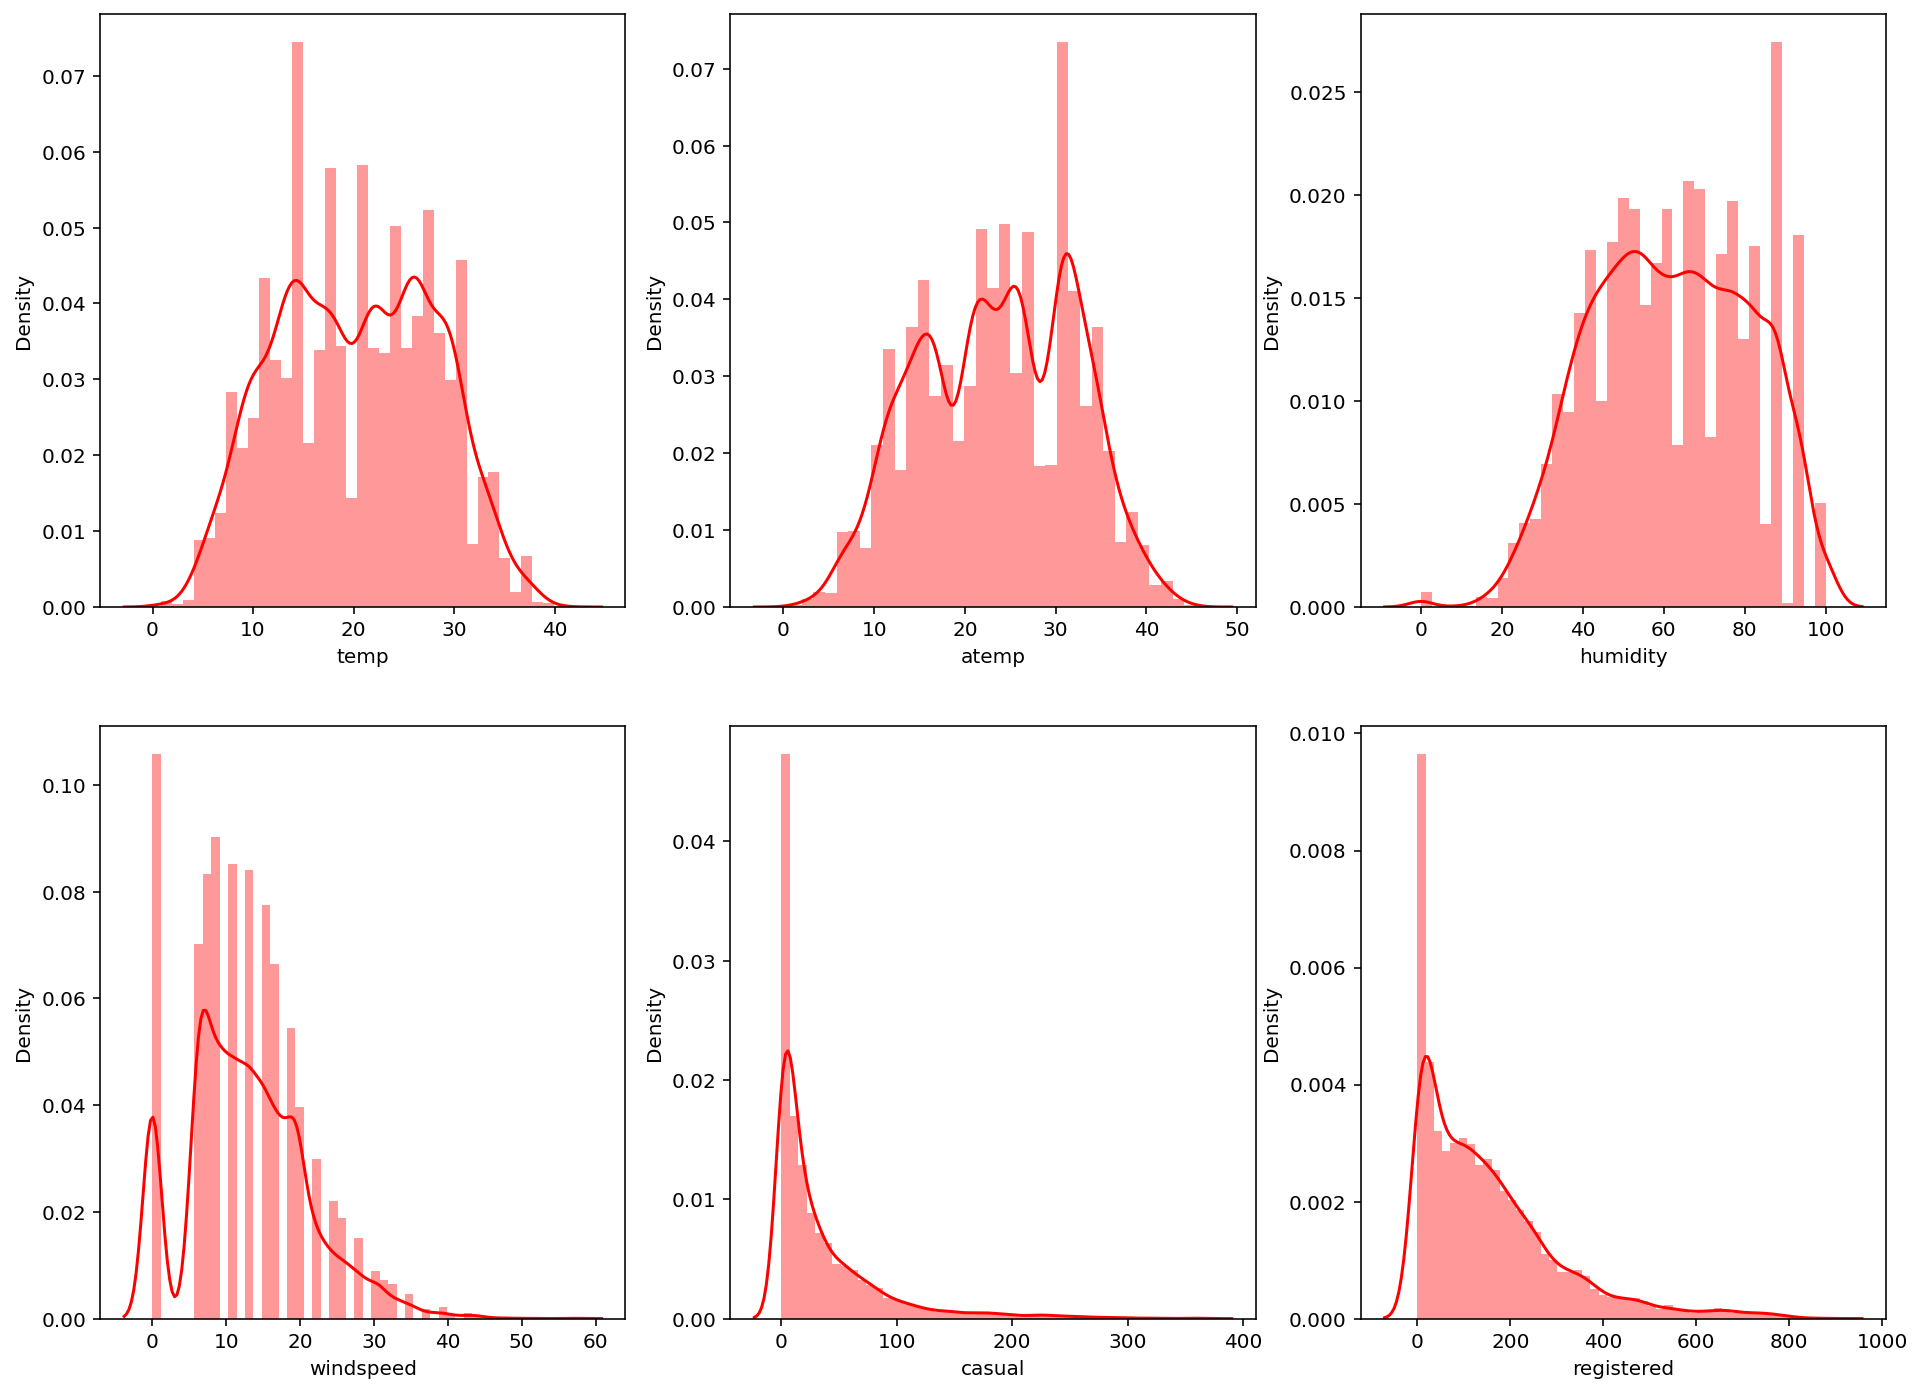

In [135]:
num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered','count']

fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(3):
        sns.distplot(df[num_cols[index]], ax=axis[row, col], color ='red' ,kde=True)
        index += 1      
plt.show()


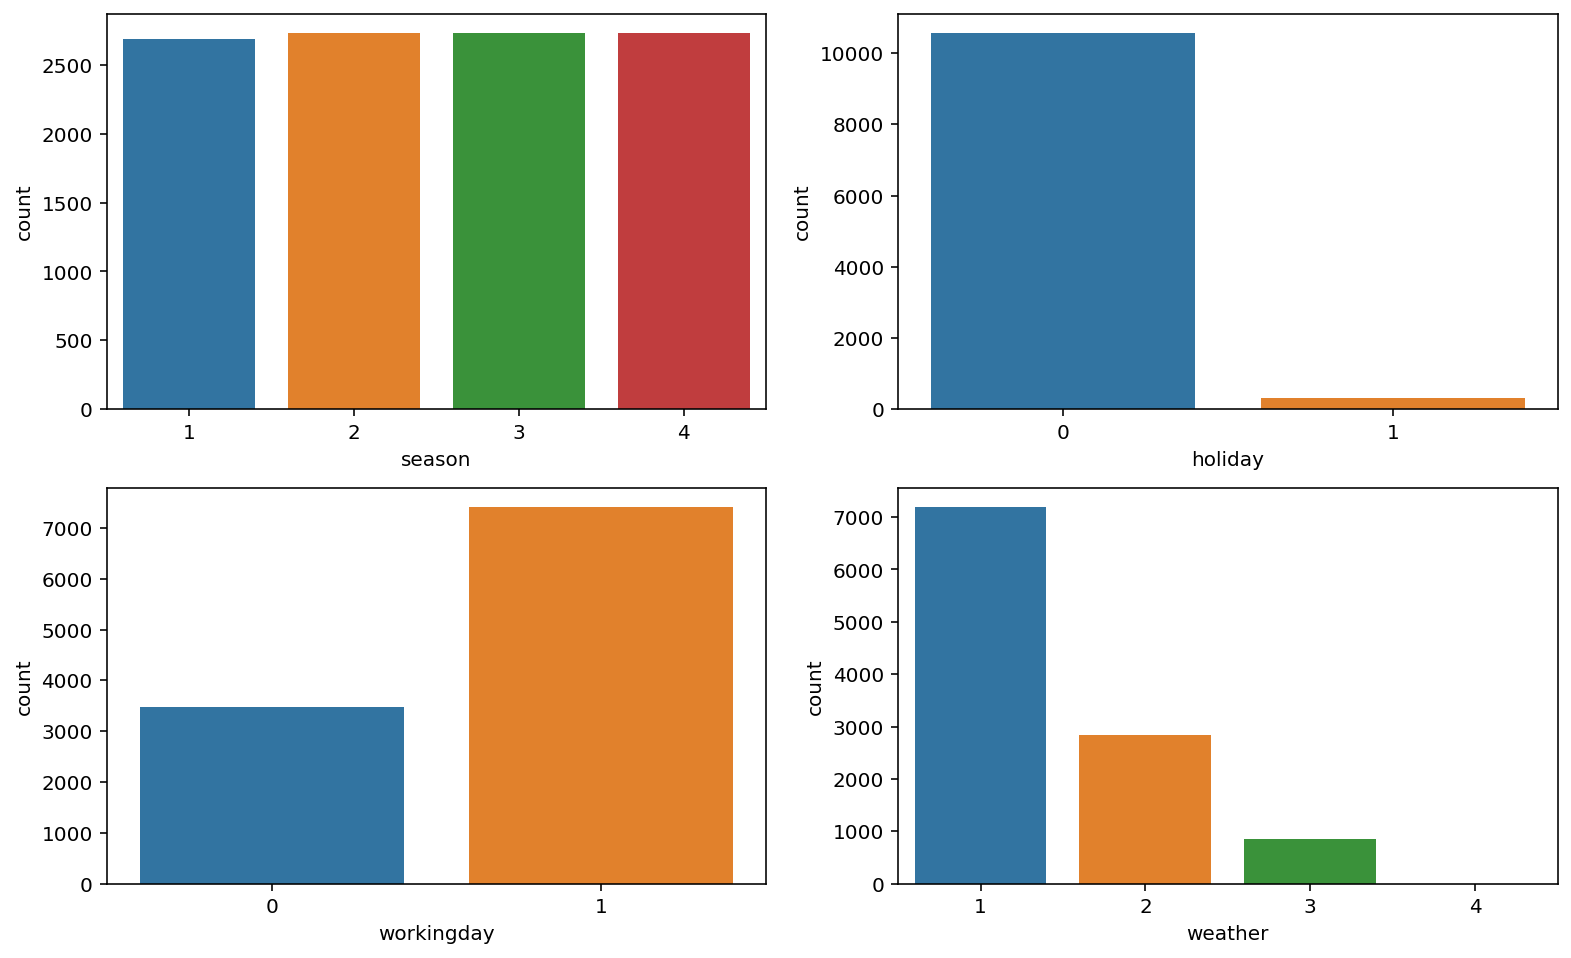

In [136]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(13, 8))

i = 0
for row in range(2):
    for col in range(2):
        sns.countplot(data=df, x=cat_cols[i], ax=axis[row, col])
        i += 1
        
plt.show()

Insights:

Count represents the number of dataset present on those categories
- We can see ,that count is more on working day than holiday
- We can also see, that the overall count is huge in very cold 
- Also we can see the same count of data present for all seasons
- And more working day data is present in dataset than holiday

In [137]:
#df['Product_Category'].nunique()

## Bi-variate analysis

In [138]:


bins=[0,13.12,17.22,22.96,27.88,41.0]
group=["very cold","cold","cool/pleasant","hot","Very hot"]
df['temp_bin']=pd.cut(df['temp'],bins=bins,labels=group)

bins=[10,100,250,400,500,1000]
group=["very low","low","average","High","Very high"]
df['count_bin']=pd.cut(df['count'],bins=bins,labels=group)



#Casual customers - tempertatue wise
md=df[df['temp_bin']=='very cold']['casual'].sum()
td=df[df['temp_bin']=='cold']['casual'].sum()
sd=df[df['temp_bin']=='cool/pleasant']['casual'].sum()
fd=df[df['temp_bin']=='hot']['casual'].sum()
kd=df[df['temp_bin']=='Very hot']['casual'].sum()

data_dict1 = {'Count':[md,td,sd,fd,kd], 'temp': ["very cold","cold","cool/pleasant","hot","Very hot"]}
df_b = pd.DataFrame(data=data_dict1, columns=['Count','temp'])
px.bar(data_frame=df_b, x="temp", y="Count", color="temp", barmode="group",title="Total Casual customers rented yulu bike- temperature category")

In [139]:

#Registered customers - temperature wise 
md=df[df['temp_bin']=='very cold']['registered'].sum()
td=df[df['temp_bin']=='cold']['registered'].sum()
sd=df[df['temp_bin']=='cool/pleasant']['registered'].sum()
fd=df[df['temp_bin']=='hot']['registered'].sum()
kd=df[df['temp_bin']=='Very hot']['registered'].sum()

data_dict1 = {'Count':[md,td,sd,fd,kd], 'temp': ["very cold","cold","cool/pleasant","hot","Very hot"]}
df_b = pd.DataFrame(data=data_dict1, columns=['Count','temp'])
px.bar(data_frame=df_b, x="temp", y="Count", color="temp", barmode="group",title="Total Registered customers rented yulu bike- temperature category")

Insights:

1. We can clearly see that , registered customers rented more number of bikes than casual 
2. More number of bikes rented in very hot temperatures
3. Registered customers rented almost same number of bikes in cool/pleasant and hot temperatures
4. by casual customers, bike rented is very low in cold conditions

holiday
0    156.094941
1    137.096463
Name: registered, dtype: float64

Text(0, 0.5, 'Mean count of casual customers')

<function matplotlib.pyplot.show(*args, **kw)>

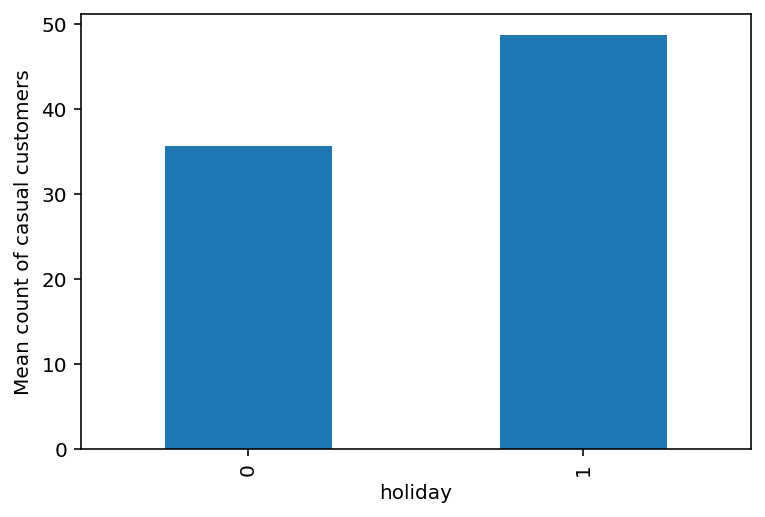

In [140]:
# registered customers mean on working and non working days
df.groupby("holiday")["registered"].mean()
print()
print()
df.groupby("holiday").mean()["casual"].plot.bar()
plt.ylabel("Mean count of casual customers")
plt.show


- We can observe , more mean on holiday than on not holiday days

workingday
0    59.308290
1    25.107663
Name: casual, dtype: float64

Text(0, 0.5, 'Mean count of casual customers')

<function matplotlib.pyplot.show(*args, **kw)>

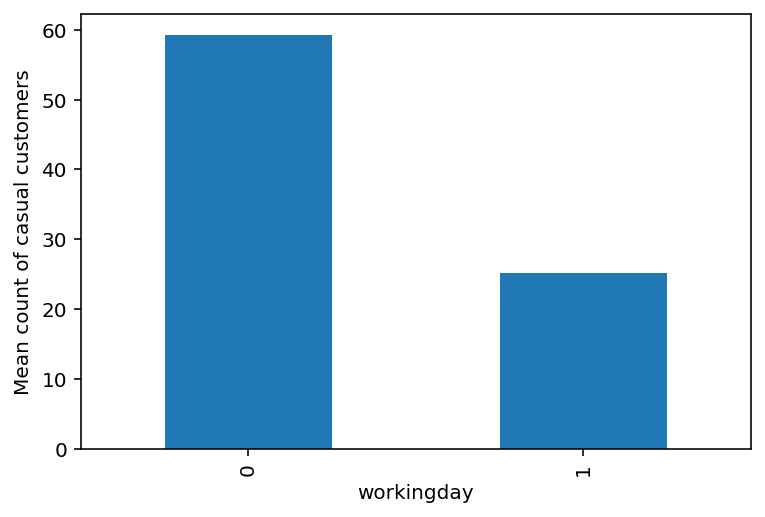

In [141]:
# Casual customers mean on working and non working days
df.groupby("workingday")["casual"].mean()
print()
print()
df.groupby("workingday").mean()["casual"].plot.bar()
plt.ylabel("Mean count of casual customers")
plt.show

Mean is more on non working day than working day for casual and registered users

workingday
0    129.198330
1    167.904209
Name: registered, dtype: float64

Text(0, 0.5, 'Mean count of casual customers')

<function matplotlib.pyplot.show(*args, **kw)>

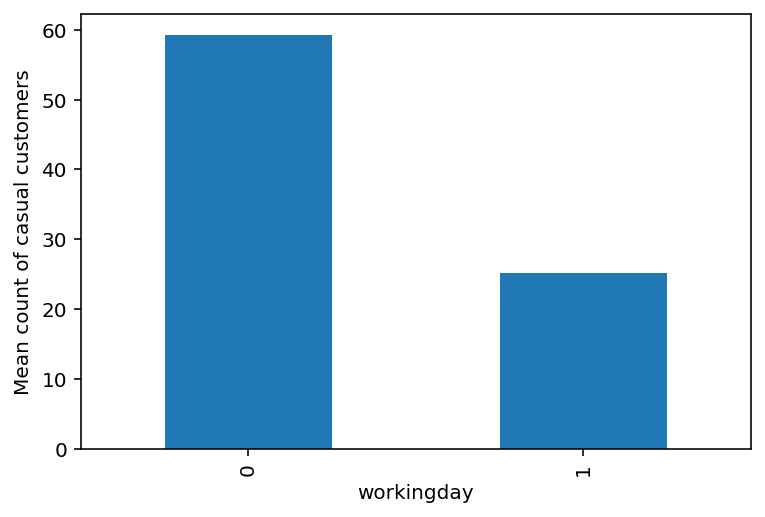

In [142]:
# registered customers mean on working and non working days
df.groupby("workingday")["registered"].mean()
print()
print()
df.groupby("workingday").mean()["casual"].plot.bar()
plt.ylabel("Mean count of casual customers")
plt.show

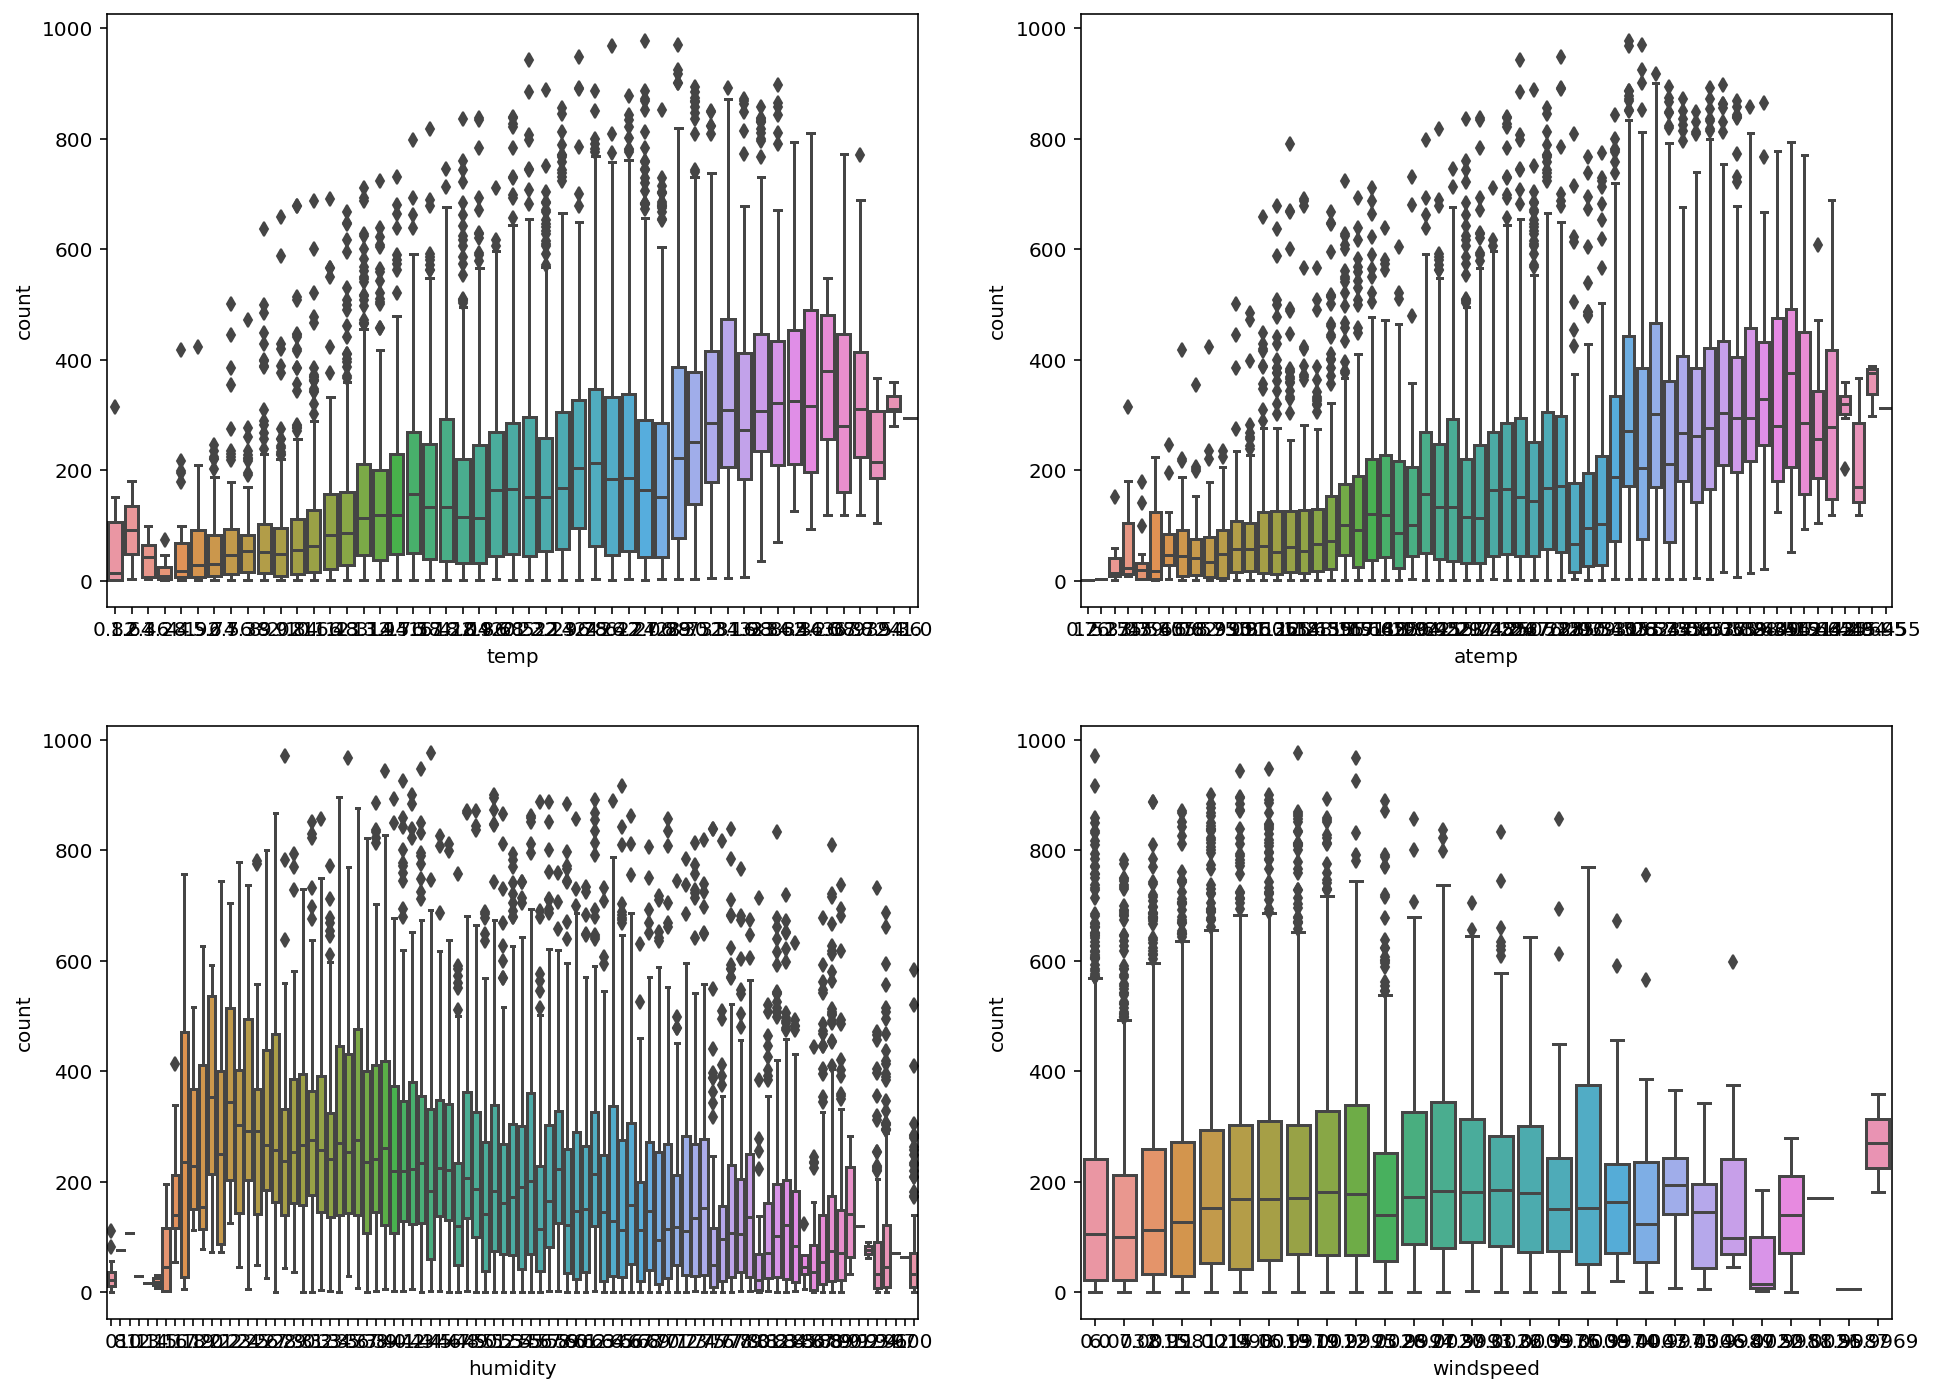

In [143]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
cols= ['temp', 'atemp', 'humidity', 'windspeed','workingday','holiday']
index = 0
for row in range(2):
    for col in range(2):
        sns.boxplot(data=df, x=cols[index], y='count', ax=axis[row, col])
        index += 1
      
plt.show()

### Crosstabs

workingday,0,1,All
count_bin,,,
very low,1213,1886,3099
low,895,2415,3310
average,584,1221,1805
High,261,385,646
Very high,234,563,797
All,3187,6470,9657


Text(0.5, 0, 'count')

Text(0, 0.5, '')

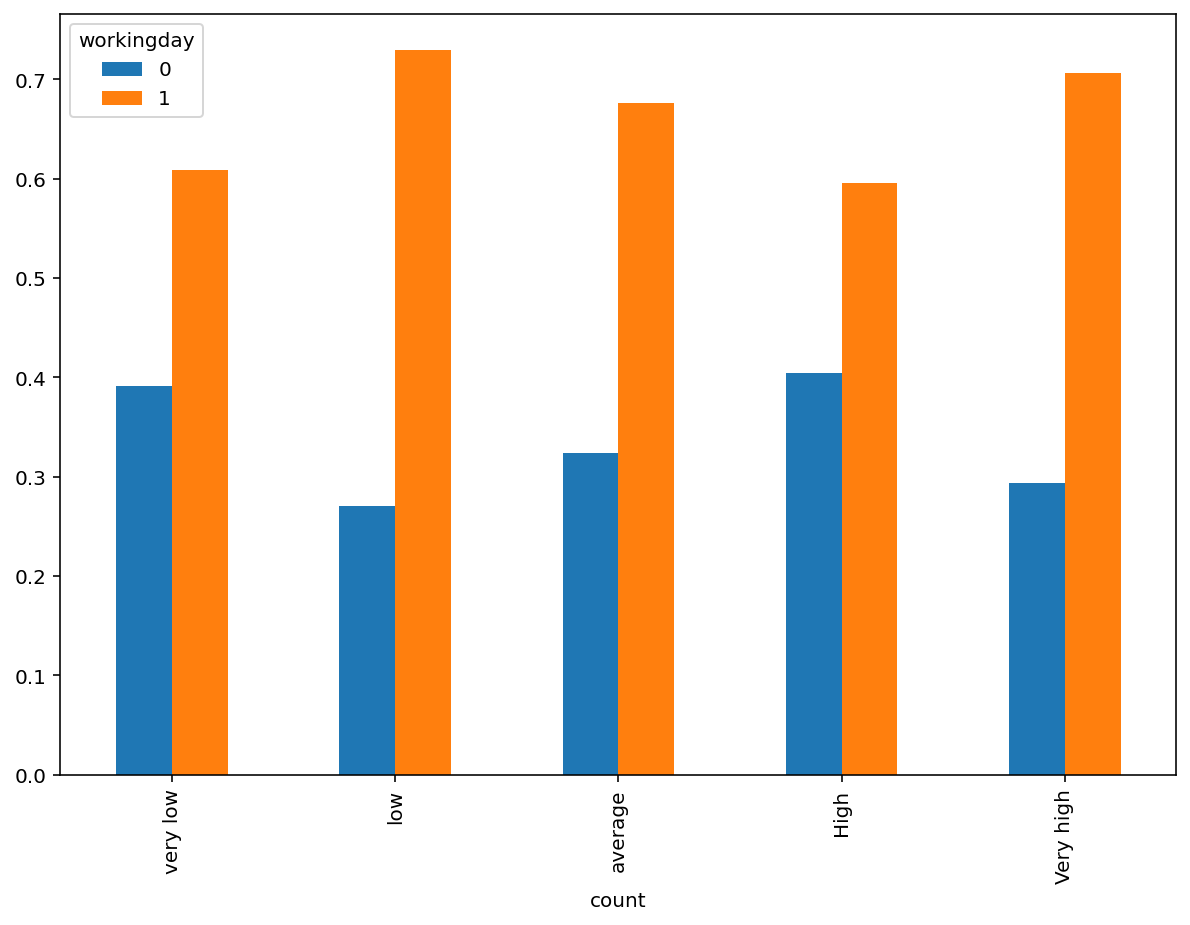

In [144]:
# Cross tab for count_bin / working day
pd.crosstab(df['count_bin'],columns=df['workingday'], margins=True)
print()
print()
totalcount=pd.crosstab(df['count_bin'],columns=df['workingday'], normalize='index')
totalcount.plot(kind='bar',figsize=(10,7))
plt.xlabel("count")
plt.ylabel("")
plt.show()

season,1,2,3,4,All
count_bin,,,,,
very low,1141,703,588,667,3099
low,771,793,809,937,3310
average,209,526,595,475,1805
High,61,168,237,180,646
Very high,59,281,271,186,797
All,2241,2471,2500,2445,9657


Text(0.5, 0, 'count')

Text(0, 0.5, '')

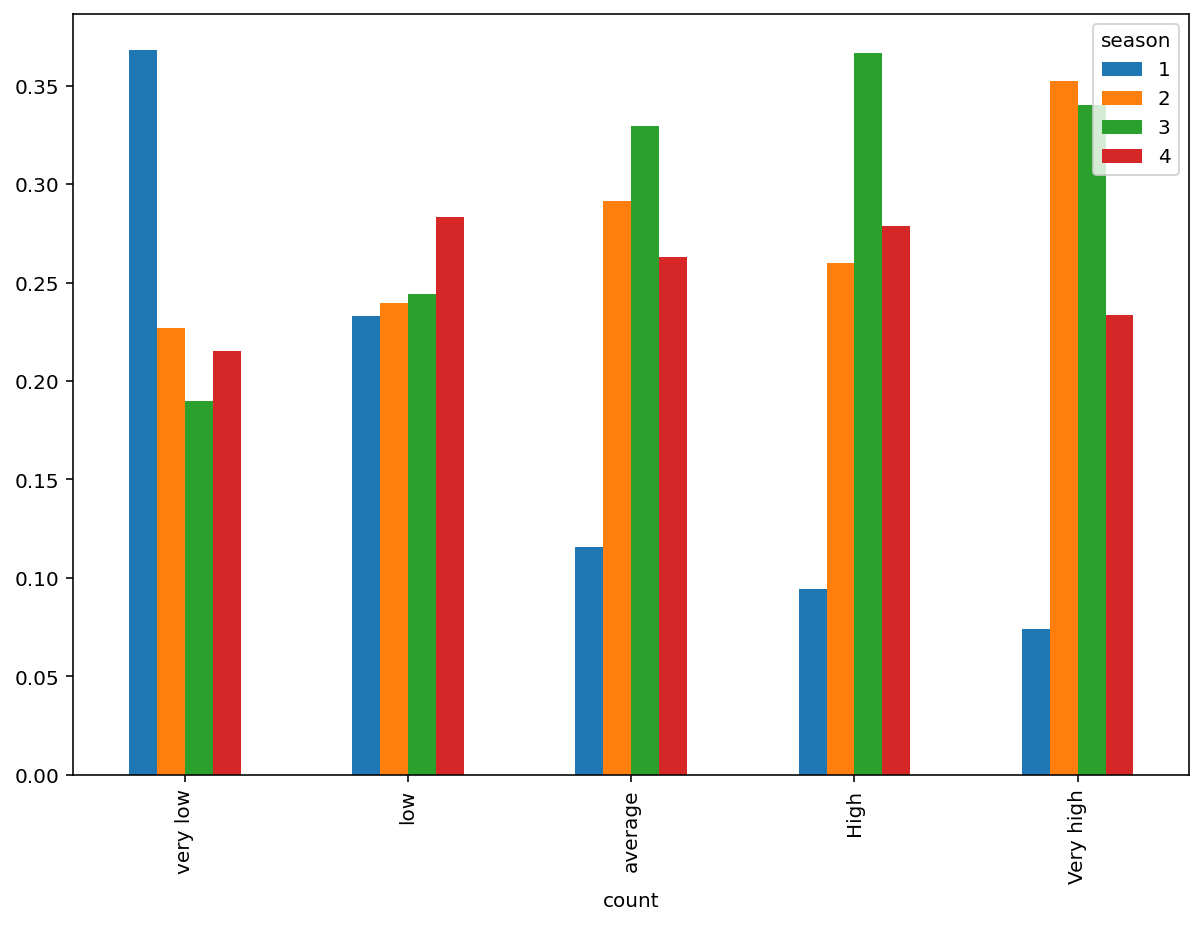

In [145]:
# Cross tab for count_bin / season
pd.crosstab(df['count_bin'],columns=df['season'], margins=True)
print()
print()
totalcount=pd.crosstab(df['count_bin'],columns=df['season'], normalize='index')
totalcount.plot(kind='bar',figsize=(10,7))
plt.xlabel("count")
plt.ylabel("")
plt.show()

temp_bin,very cold,cold,cool/pleasant,hot,Very hot,All
count_bin,,,,,,
very low,1168,576,664,494,197,3099
low,627,657,803,611,612,3310
average,140,281,386,407,591,1805
High,34,94,120,142,256,646
Very high,37,67,165,219,309,797
All,2006,1675,2138,1873,1965,9657


Text(0.5, 0, 'count')

Text(0, 0.5, '')

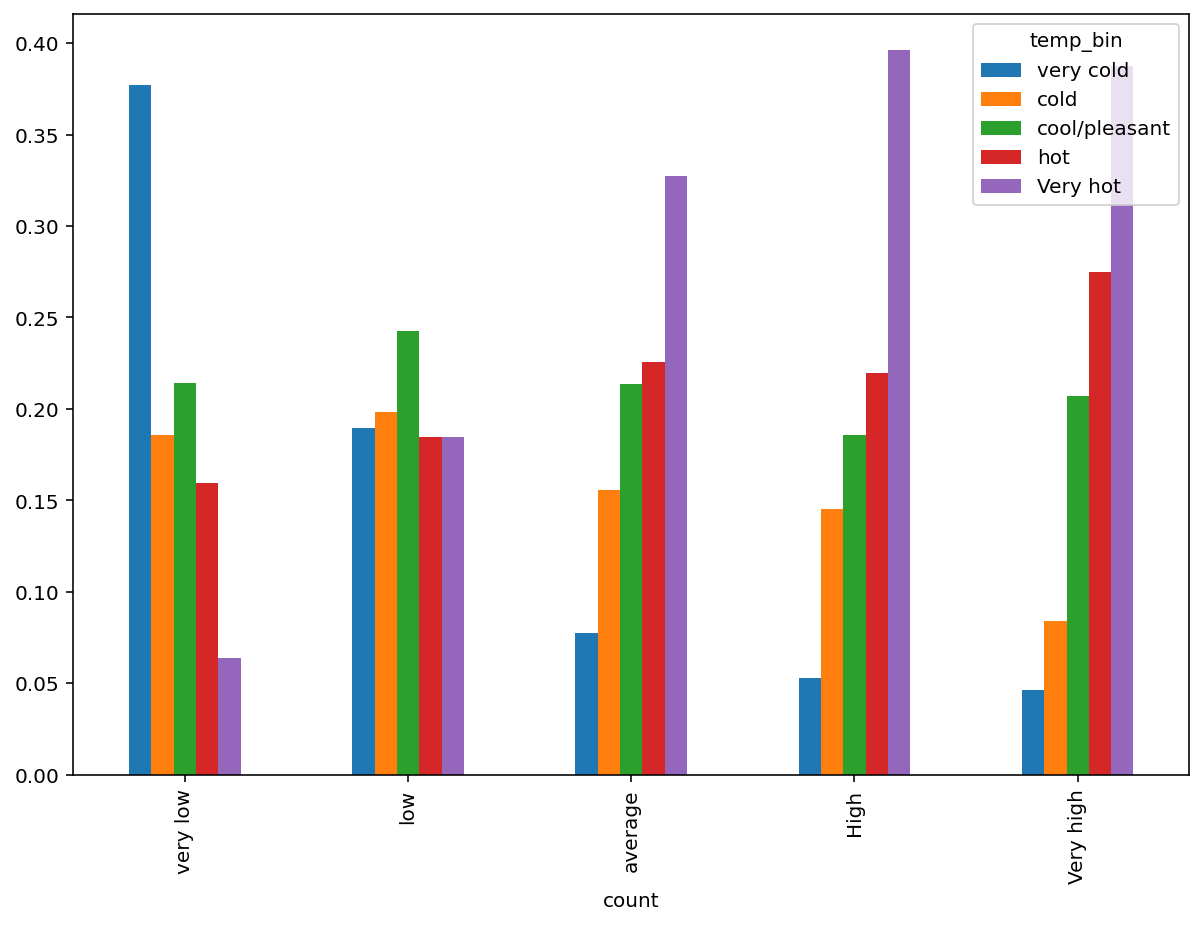

In [146]:
# Cross tab for count_bin / temperature bin
pd.crosstab(df['count_bin'],columns=df['temp_bin'], margins=True)
print()
print()
totalcount=pd.crosstab(df['count_bin'],columns=df['temp_bin'], normalize='index')
totalcount.plot(kind='bar',figsize=(10,7))
plt.xlabel("count")
plt.ylabel("")
plt.show()

Insights:

- We can see very low temperatures has more count on very cold temperature
- Count is very on season 1
- Count is quite low on working day , ie) below average

# Confidence interval- 95% on Season,workingday,temp_bins



In [147]:
sample_size = 100
collect_sample_means_working = []
collect_sample_means_Notworking=[]
collect_sample_means_clearweather=[]
collect_sample_means_rainweather=[]  #Light rain,thunderstorm

for person in range(1000):
    sample_mean_working = df[df['workingday']==1]["count"].sample(sample_size).mean()
    collect_sample_means_working.append(sample_mean_working)
    
    sample_mean_notworking = df[df['workingday']==0]["count"].sample(sample_size).mean()
    collect_sample_means_Notworking.append(sample_mean_notworking)

    sample_mean_clearweather = df[df['weather']==1]["count"].sample(sample_size).mean()
    collect_sample_means_clearweather.append(sample_mean_clearweather)

    sample_mean_rainweather = df[df['weather']==3]["count"].sample(sample_size).mean()
    collect_sample_means_rainweather.append(sample_mean_rainweather)

# Collecting a random sample mean 
m_working = collect_sample_means_working[0]
m_notworking = collect_sample_means_Notworking[0]
m_clearweather = collect_sample_means_working[0]
m_rainweather = collect_sample_means_Notworking[0]

In [148]:
#95% confidence - z values 
Zl= norm.ppf(0.025)
Zr= norm.ppf(0.975)

#workingday vs nonworking day
workingday_mean=round(df[df['workingday']==1]['count'].mean(),2)
notworkingday_mean=round(df[df['workingday']==0]['count'].mean(),2)

left = m_working + Zl * workingday_mean / np.sqrt(sample_size)
right = m_working + Zr * workingday_mean / np.sqrt(sample_size)
print(f"\n95% confidence that the population mean of bikes rented on working day is in [{np.round(left,2)}, {np.round(right,2)}]")

left = m_nonworking + Zl * notworkingday_mean / np.sqrt(sample_size)
right = m_nonworking + Zr * notworkingday_mean / np.sqrt(sample_size)
print(f"\n95% confidence that the population mean bikes rented on Non-working day is in [{np.round(left,2)}, {np.round(right,2)}]")

#weather - 1-clear vs 3-raining
clearweather_mean=round(df[df['weather']==1]['count'].mean(),2)
rainweather_mean=round(df[df['weather']==4]['count'].mean(),2)

left = m_clearweather + Zl * clearweather_mean / np.sqrt(sample_size)
right = m_clearweather + Zr * clearweather_mean / np.sqrt(sample_size)
print(f"\n95% confidence that the population mean of bikes rented on clear weather day is in [{np.round(left,2)}, {np.round(right,2)}]")

left = m_rainweather + Zl * rainweather_mean / np.sqrt(sample_size)
right = m_rainweather + Zr * rainweather_mean / np.sqrt(sample_size)
print(f"\n95% confidence that the population mean bikes rented on rainy day is in [{np.round(left,2)}, {np.round(right,2)}]")


95% confidence that the population mean of bikes rented on working day is in [187.88, 263.54]

95% confidence that the population mean bikes rented on Non-working day is in [178.56, 252.46]

95% confidence that the population mean of bikes rented on clear weather day is in [185.48, 265.94]

95% confidence that the population mean bikes rented on rainy day is in [116.86, 181.14]


### Test the statistics signifoicance of created bin


### Hypothesis Testing - 1 - chi2_square test



* Null Hypothesis (H0): Weather is independent of the season

* Alternate Hypothesis (H1): Weather is not independent of the season

* Statastic Significance level (alpha): 0.05


In [149]:
## season vs weather 
 
data_corr = pd.crosstab(df['season'], df['weather'])
p_val= chi2_contingency(data_corr)[1]
print("P-value::",p_val)
if p_val <= 0.05:
    print("Since p-value is less than the alpha-value 0.05, We reject the Null Hypothesis. This tells that season and weather is dependent on each other")
else:
    print("p-value is greater than the alpha 0.05, We do not reject the Null Hypothesis")



P-value:: 1.549925073686492e-07
Since p-value is less than the alpha-value 0.05, We reject the Null Hypothesis. This tells that season and weather is dependent on each other


P-value is less then alpha - 0.05 , We reject the Null Hypothesis (Ho). This implies that Weather is dependent on the season.

### Similarly we can test for other features as well

In [150]:
 # H0: The two features not dependent (independent)
# Ha : Two features are dependent

#p-value > alpha - accept-h0 - independent
#p-value < alpha -reject h0- dependent


#chi2_contingency returns - chi stat, p value, df, expected freq
alpha = 0.05
columns=['season','workingday','holiday',"temp_bin","weather"]
for cols in columns:
   s= pd.crosstab(df[cols], df["count_bin"])
   print(cols,"vs Count")
   print("*"*10)
   print(s)
   print()
   print("--"*25)
   p_val = chi2_contingency(s)[1]
   print(cols,":::::  P-Val::::",p_val)
   print("--"*25)
   if p_val <= alpha:
     print("Since p-value is less than alpha . we reject❌ null hypothesis. ie)", cols,"and count- these two features are dependent✅")
     print()
   else:
     print("P-value is high , we fail to reject hypothesis✅ . ie)",cols,"and count- these two features are not dependent❌")


season vs Count
**********
count_bin  very low  low  average  High  Very high
season                                            
1              1141  771      209    61         59
2               703  793      526   168        281
3               588  809      595   237        271
4               667  937      475   180        186

--------------------------------------------------
season :::::  P-Val:::: 2.3742678204672775e-146
--------------------------------------------------
Since p-value is less than alpha . we reject❌ null hypothesis. ie) season and count- these two features are dependent✅

workingday vs Count
**********
count_bin   very low   low  average  High  Very high
workingday                                          
0               1213   895      584   261        234
1               1886  2415     1221   385        563

--------------------------------------------------
workingday :::::  P-Val:::: 1.5589395706327197e-26
--------------------------------------------------

Insights: 

As we see, 
- temp_bin and count are dependent
-  holiday and count
- working day and count 
- season and count 

all these features are dependent

# Hypothesis testing 2  - 2-sample T test


This is a method used to test whether the unknown population means of two groups are equal or not.

A two-sample t-test is used to analyze the results from A/B tests. Randomly sampled from two normal populations and the two independent groups have equal variances.



In [151]:
# Working day vs non-working day 
df_nonwork = df[df['workingday']==0]['count'].values
df_work = df[df['workingday']==1]['count'].values

#finding ratio
(np.var(df_nonwork)/np.var(df_work))

0.8863316166625292

In [152]:
# 2- sample t test
stats.ttest_ind(a=df_nonwork, b=df_work, equal_var=True)

Ttest_indResult(statistic=-1.2096277376026694, pvalue=0.22644804226361348)

We see , tha variances of two data is almost equal , and less, we proceeded with 2-sample t test , and as a result , we get p-value less than 0.05(alpha value)

 Since pvalue is greater than 0.05 .We can not reject the Null hypothesis. this implies that working day has no direct effect on the number of yulu bikes being rented.

In [153]:
#holiday vs not holiday
df_notholiday = df[df['holiday']==0]['count'].values
df_holiday = df[df['holiday']==1]['count'].values

np.var(df_notholiday), np.var(df_holiday)

(32943.901106481346, 28233.99150132856)

Since variance is not equal or almost equal , we cannot proceed with 2-sample t test for holiday and count


# Hypothesis Testing -3 - Anova

In [154]:
w1 = df[df['weather']==1]['count'].values
w2 = df[df['weather']==2]['count'].values
w3 = df[df['weather']==3]['count'].values
w4 = df[df['weather']==4]['count'].values

s1 = df[df['season']==1]['count'].values
s2 = df[df['season']==2]['count'].values
s3 = df[df['season']==3]['count'].values
s4 = df[df['season']==4]['count'].values

In [155]:
# Anova test
stats.f_oneway(w1, w2, w3, w4, s1, s2, s3, s4)

F_onewayResult(statistic=127.96661249562491, pvalue=2.8074771742434642e-185)

As we see in above test result , p-value is less than 0.05,

we reject the null hypothesis. This states that no of yulu bikes rented is not similar/statastical in different weather and season conditions , mentioned in data.

In [156]:
## temperature vs count

t1 = df[df['temp_bin']=="very cold"]['count'].values
t2 = df[df['temp_bin']=="cold"]['count'].values
t3 = df[df['temp_bin']=="cool/pleasant"]['count'].values
t4 = df[df['temp_bin']=="hot"]['count'].values
t5 = df[df['temp_bin']=="Very hot"]['count'].values

In [157]:
stats.f_oneway(t1,t2,t3,t4,t5)

F_onewayResult(statistic=485.31640145205574, pvalue=0.0)

P-values is less than 0.05 , and the features are not similar in different temperatures

# Observations

As analysed in dataset , we can come with following observations


-  We can see , there is only one data available for heavy rainy day,
- In heat map , we can see season ,weather is correlated 
- We also see, working day has more number of bikes rented than non working day
- On weather 1 has more number of bikes rented
- Whenever , there is heavy rain, the bikes rented is low
- On very hot day , there are more count of bikes rented and less bikes on very cold climate
- Also more mean count on holidays than non holiday days
- Also we can see , the 95% confidence interval for working day is in (142,217)
- And Confidence interval 95% for rainy weather is [161.13, 225.41]
- In hypothesis test , we can find that season and weather are not dependent
- Also season , working day , holiday , temp_bin are also dependent to count of bikes being rented
- Humidity less than 20 , the count of bikes being rented falls to very low
 

# Recommendations

1. In rainy weather , less bikes are rented , this can be increased by promotional Offers
2. Working day and non working day , there is much difference in renting the bikes , this can increased 
3. During cold weather , company should have less bikes available , and this can decrease the maintenance cost on those seasonal weather
4.  In very low humid days, company should have less bikes in the stock to be rented.
5. And the same , in case of thunderstorms and heavy rain , since , on those days , people wouldn’t prefer to go out. Company should bring less bikes for rent.
6. When windspeed is high , company should have less bikes for renting.